In [1]:
import pandas as pd

# Load CSV file
df = pd.read_csv('house_price_data.csv')



In [2]:

# View first few rows
print(df.head())

   property_id neighborhood  distance_to_city_center  distance_to_metro  \
0  PROP_000001  Forest Glen                      6.6                908   
1  PROP_000002     Lakeside                      2.6                 84   
2  PROP_000003     Downtown                     10.2                 50   
3  PROP_000004    Riverside                      5.1                475   
4  PROP_000005      Oakwood                      0.5                647   

   distance_to_school  crime_rate  house_age  total_area  bedrooms  bathrooms  \
0                 296         1.0         22         103         3          3   
1                  30         1.0         12         114         2          2   
2                 120         1.0         21          83         5          3   
3                  48         1.0          0         127         3          1   
4                 111         1.0         21          59         6          2   

   ...  construction_quality  renovation_status  heating_type 

In [3]:
# Count of missing values per column
print(df.isnull().sum())

# Percentage of missing values
missing_percent = df.isnull().mean() * 100
print("Missing Values (%):\n", missing_percent)


property_id                0
neighborhood               0
distance_to_city_center    0
distance_to_metro          0
distance_to_school         0
crime_rate                 0
house_age                  0
total_area                 0
bedrooms                   0
bathrooms                  0
floors                     0
garage                     0
garden                     0
basement                   0
balcony                    0
construction_quality       0
renovation_status          0
heating_type               0
air_conditioning           0
parking_spaces             0
energy_efficiency          0
listing_duration           0
season_sold                0
year_sold                  0
sale_price                 0
dtype: int64
Missing Values (%):
 property_id                0.0
neighborhood               0.0
distance_to_city_center    0.0
distance_to_metro          0.0
distance_to_school         0.0
crime_rate                 0.0
house_age                  0.0
total_area              

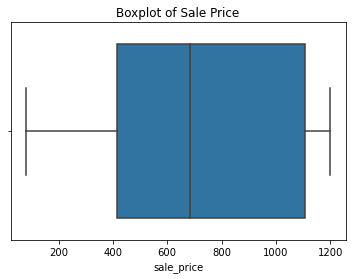

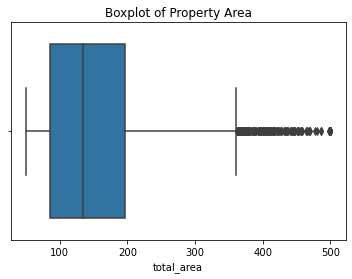

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for target variable (Sale Price)
sns.boxplot(x=df['sale_price'])
plt.title("Boxplot of Sale Price")
plt.show()

# Example: Outliers in 'area'
sns.boxplot(x=df['total_area'])
plt.title("Boxplot of Property Area")
plt.show()


In [5]:
Q1 = df['sale_price'].quantile(0.25)
Q3 = df['sale_price'].quantile(0.75)
IQR = Q3 - Q1

# Outlier boundaries
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['sale_price'] < lower) | (df['sale_price'] > upper)]
print("Outliers in Sale Price:", outliers.shape[0])

Outliers in Sale Price: 0


In [6]:
Q1 = df['total_area'].quantile(0.25)
Q3 = df['total_area'].quantile(0.75)
IQR = Q3 - Q1

# Outlier boundaries
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['total_area'] < lower) | (df['total_area'] > upper)]
print("Outliers in total area:", outliers.shape[0])

Outliers in total area: 193


In [7]:
# Numerical columns summary
print(df.describe())

# Categorical column distribution 
print(df['neighborhood'].value_counts())


       distance_to_city_center  distance_to_metro  distance_to_school  \
count              8000.000000        8000.000000         8000.000000   
mean                  3.785213         337.536250          148.724875   
std                   3.953137         350.469891          165.435271   
min                   0.500000          50.000000           30.000000   
25%                   1.000000          94.750000           35.000000   
50%                   2.500000         221.000000           90.000000   
75%                   5.100000         455.000000          194.000000   
max                  25.000000        3000.000000         1748.000000   

       crime_rate    house_age   total_area     bedrooms    bathrooms  \
count      8000.0  8000.000000  8000.000000  8000.000000  8000.000000   
mean          1.0    14.295125   150.608125     3.359500     2.502875   
std           0.0    14.677669    83.534599     1.129345     0.802074   
min           1.0     0.000000    50.000000     1.

In [8]:
#data quality check
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [9]:
print(df.dtypes)


property_id                 object
neighborhood                object
distance_to_city_center    float64
distance_to_metro            int64
distance_to_school           int64
crime_rate                 float64
house_age                    int64
total_area                   int64
bedrooms                     int64
bathrooms                    int64
floors                       int64
garage                       int64
garden                       int64
basement                     int64
balcony                      int64
construction_quality        object
renovation_status           object
heating_type                object
air_conditioning             int64
parking_spaces               int64
energy_efficiency           object
listing_duration             int64
season_sold                 object
year_sold                    int64
sale_price                 float64
dtype: object


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew


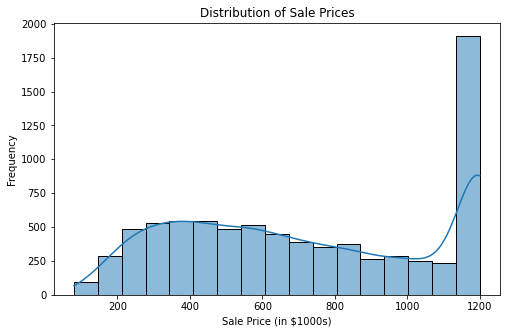

Skewness of sale price: 0.07300029773629817


In [11]:
#analysis for skewness
plt.figure(figsize=(8, 5))
sns.histplot(df['sale_price'], kde=True)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price (in $1000s)")
plt.ylabel("Frequency")
plt.show()

# Skewness
print("Skewness of sale price:", df['sale_price'].skew())


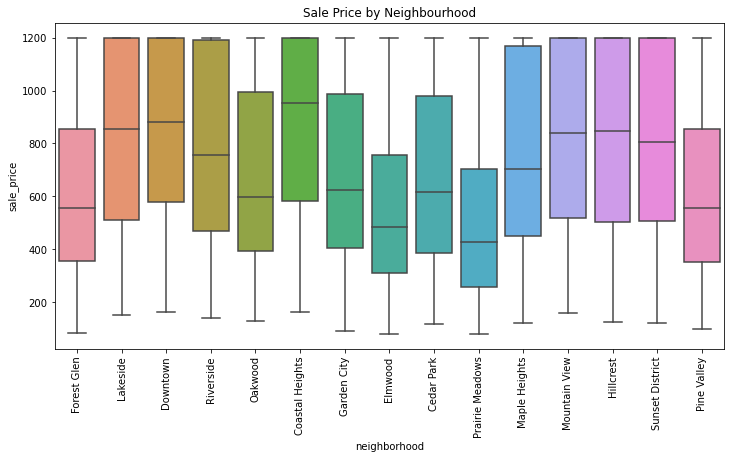

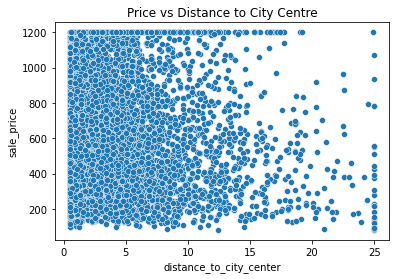

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='neighborhood', y='sale_price')
plt.xticks(rotation=90)
plt.title("Sale Price by Neighbourhood")
plt.show()

sns.scatterplot(data=df, x='distance_to_city_center', y='sale_price')
plt.title("Price vs Distance to City Centre")
plt.show()


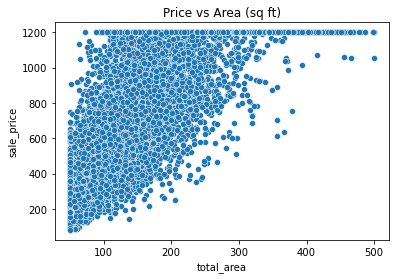

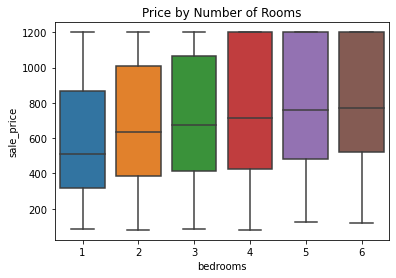

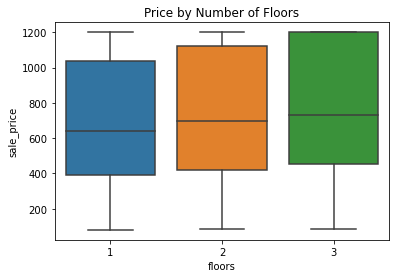

In [13]:
#Investigate Property feature relationship
sns.scatterplot(data=df, x='total_area', y='sale_price')
plt.title("Price vs Area (sq ft)")
plt.show()

sns.boxplot(data=df, x='bedrooms', y='sale_price')
plt.title("Price by Number of Rooms")
plt.show()

sns.boxplot(data=df, x='floors', y='sale_price')
plt.title("Price by Number of Floors")
plt.show()


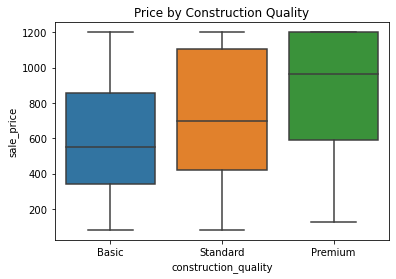

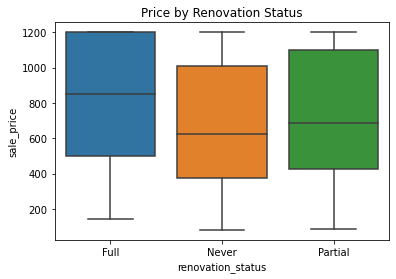

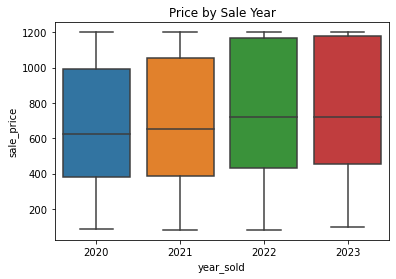

In [14]:
sns.boxplot(data=df, x='construction_quality', y='sale_price')
plt.title("Price by Construction Quality")
plt.show()

sns.boxplot(data=df, x='renovation_status', y='sale_price')
plt.title("Price by Renovation Status")
plt.show()

sns.boxplot(data=df, x='year_sold', y='sale_price')
plt.title("Price by Sale Year")
plt.show()


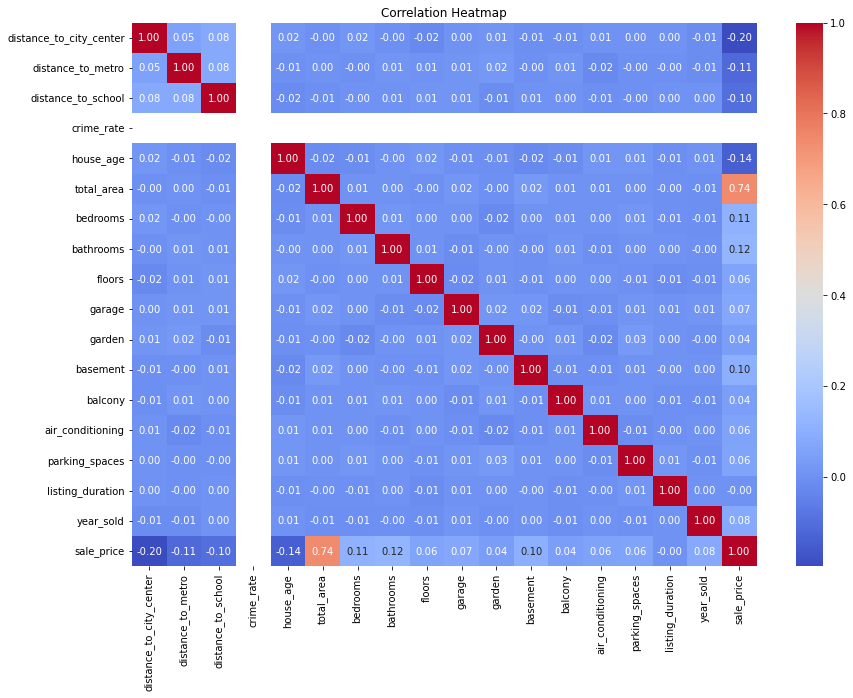

Top correlated features with Sale Price:
 sale_price          1.000000
total_area          0.740486
bathrooms           0.122902
bedrooms            0.112459
basement            0.102643
year_sold           0.081629
garage              0.070667
parking_spaces      0.063897
floors              0.059866
air_conditioning    0.058422
Name: sale_price, dtype: float64


In [15]:
#correlation analysis 
plt.figure(figsize=(14, 10))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Check multicollinearity with high correlations
high_corr = corr['sale_price'].sort_values(ascending=False)
print("Top correlated features with Sale Price:\n", high_corr.head(10))


In [16]:

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# One-hot encode categorical columns (drop_first to avoid dummy trap)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Categorical columns: Index(['property_id', 'neighborhood', 'construction_quality',
       'renovation_status', 'heating_type', 'energy_efficiency',
       'season_sold'],
      dtype='object')


In [17]:
#Feature engineering
# New feature: price per square foot
df_encoded['price_per_sqft'] = df['sale_price'] / df['total_area']


In [18]:
# Address outliers
def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(
            df[col] < lower_bound, lower_bound,
            np.where(df[col] > upper_bound, upper_bound, df[col])
        )
    return df

# FIX: use your original df here
numeric_cols = df.select_dtypes(include="number").columns  

# First encoding step (if needed)
df_encoded = df.copy()  

# Then cap outliers
df_encoded = cap_outliers_iqr(df_encoded, numeric_cols)


In [19]:
#addressing multicollinearity
corr_matrix = df_encoded.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop columns with correlation > 0.85
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
print("Dropping due to multicollinearity:", to_drop)

df_encoded.drop(columns=to_drop, inplace=True)


Dropping due to multicollinearity: []


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# 1. Select only numeric features
X = df.drop('sale_price', axis=1)
X = X.select_dtypes(include=[np.number])

# 2. Fill or drop missing values
X = X.fillna(0)  # or X = X.dropna()

# 3. Add constant for intercept
X = sm.add_constant(X)

# 4. Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                    feature           VIF
0   distance_to_city_center  1.010655e+00
1         distance_to_metro  1.009969e+00
2        distance_to_school  1.013575e+00
3                crime_rate  3.603081e+06
4                 house_age  1.002711e+00
5                total_area  1.001521e+00
6                  bedrooms  1.001525e+00
7                 bathrooms  1.000733e+00
8                    floors  1.001638e+00
9                    garage  1.002032e+00
10                   garden  1.002940e+00
11                 basement  1.001659e+00
12                  balcony  1.001198e+00
13         air_conditioning  1.001760e+00
14           parking_spaces  1.001776e+00
15         listing_duration  1.000681e+00
16                year_sold  1.000876e+00


In [21]:
from sklearn.model_selection import train_test_split

# Separate features & target
X = df_encoded.drop(columns=['sale_price'])
y = df_encoded['sale_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (6400, 24)
Test shape: (1600, 24)


In [22]:
#task4 and task 5
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [23]:


# Identify categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

# Drop target and ID from categorical list if present
categorical_cols = [col for col in categorical_cols if col not in ['sale_price', 'property_id']]

# One-hot encode categorical variables
df_processed = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Drop property_id (still not useful for prediction)
df_processed = df_processed.drop(columns=['property_id'])

# Features and target
X = df_processed.drop(columns=['sale_price'])
y = df_processed['sale_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [24]:

# Predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Train set evaluation
train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)

# Test set evaluation
test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

print("Train Performance:")
print(f"MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.4f}")

print("\nTest Performance:")
print(f"MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.4f}")

Train Performance:
MAE: 104.20, MSE: 18142.67, RMSE: 134.69, R²: 0.8529

Test Performance:
MAE: 104.78, MSE: 17881.71, RMSE: 133.72, R²: 0.8532


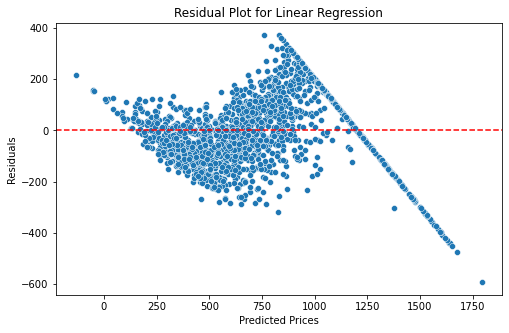

In [25]:
#residual plot
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.show()